# Complete Machine Learning Pipeline with Scikit-learn



## 1: Import Libraries
- NumPy, Pandas, Matplotlib, Seaborn
- Scikit-learn modules (e.g., models, metrics, preprocessing, PCA)

---

## 2: Load the Dataset
- Load from local/URL
- Display first few rows
- Check shape and types

---

## 3: Exploratory Data Analysis (EDA)

EDA is the process of exploring and understanding your data **before** applying any machine learning models. This helps identify patterns, trends, and anomalies.

### 3.1: Understand the Dataset Structure
- `df.shape`: check number of rows and columns
- `df.columns`: list of feature names
- `df.dtypes`: data types of each column
- `df.head()` and `df.tail()`: preview data

### 3.2: Summary Statistics
- `df.describe()`: statistical summary (mean, std, min, max, etc.)
- `df.describe(include='object')`: summary for categorical features
- `df.nunique()`: count of unique values per column

### 3.3: Missing Value Analysis
- `df.isnull().sum()`: total missing values per column
- `df.isnull().mean()*100`: percentage of missing values
- Visualize with: `sns.heatmap(df.isnull(), cbar=False)`

### 3.4: Duplicate and Constant Values
- Check for duplicates: `df.duplicated().sum()`
- Drop duplicates: `df.drop_duplicates()`
- Identify constant columns: `df.loc[:, df.nunique() == 1]`

### 3.5: Target Variable Distribution
- Use `df['target'].value_counts()` for classification
- Use histogram/kde for regression target
- Visualize with `sns.countplot()` or `sns.histplot()`

### 3.6: Univariate Analysis
- For numerical features: histograms (`df.hist()`), `sns.boxplot()`, `sns.kdeplot()`
- For categorical features: bar plots using `sns.countplot()`

### 3.7: Bivariate Analysis
- **Numerical vs Target**:
  - `sns.boxplot(x='target', y='feature', data=df)`
  - Group by target and summarize
- **Categorical vs Target**:
  - Cross-tabulations: `pd.crosstab(df['cat_feature'], df['target'])`
  - Stacked bar charts or group bar plots

### 3.8: Feature Relationships
- Scatter plots: `sns.scatterplot(x, y)`
- Pair plots for small datasets: `sns.pairplot(df, hue='target')`
- Group-wise mean analysis: `df.groupby('target').mean()`

### 3.9: Correlation Analysis
- Compute correlations: `df.corr()`
- Visualize using heatmap: `sns.heatmap(df.corr(), annot=True, cmap='coolwarm')`
- Identify multicollinearity (high correlation between independent variables)

### 3.10: Distribution Shape & Outlier Detection
- Use boxplots to detect outliers per feature
- Use `sns.violinplot()` for distribution + outlier visualization
- Z-score or IQR method for quantitative outlier detection

### 3.11: Insights and Observations
- Summarize key findings:
  - Which features are skewed?
  - Which features show class imbalance?
  - Any evident outliers or missing values?
  - Which features may be highly predictive?
---

## 4: Data Cleaning and Preprocessing
- Handle missing values (drop or impute)
- Encode categorical features (Label/One-Hot Encoding)
- Scale numerical features (StandardScaler / MinMaxScaler)
- Feature selection (optional)

---

## 5: Dimensionality Reduction (Optional but encouraged)
- Apply **PCA** to reduce dimensions
- Visualize 2D/3D projection
- Check explained variance ratio

---

## 6: Split the Dataset
- Use `train_test_split()` to split into training and testing sets

---

## 7: Train ML Models
- Fit one or more models:
  - Logistic Regression
  - Decision Tree / Random Forest
  - KNN / SVM / XGBoost (optional)

---

## 8: Make Predictions
- Use `.predict()` on the test set

---

## 9: Evaluate the Model
- Accuracy, Precision, Recall, F1-score
- Confusion Matrix
- ROC Curve and AUC (for binary classification)
- Cross-validation (optional)

---

## 10: Model Tuning (Optional)
- Hyperparameter tuning using `GridSearchCV` or `RandomizedSearchCV`

---

## 11: Save and Export the Model (Optional)
- Use `joblib` or `pickle` to save the trained model

---

## 12: Final Summary and Insights
- List key findings
- Interpret model performance
- Discuss how features influenced the target

---


# K-Means Clustering



## What is Clustering?

Clustering is an **unsupervised learning** technique used to group similar data points into clusters. Unlike classification, clustering doesn't use labeled data.

## Types of Clustering Algorithms
- **Partition-based**: e.g., K-Means
- **Density-based**: e.g., DBSCAN
- **Hierarchical**: e.g., Agglomerative, Divisive

## Applications
- Customer segmentation
- Image compression
- Market basket analysis
- Topic modeling

We'll explore **K-Means Clustering** using simple examples and real-world datasets. We'll start with 2D **synthetic data** for better visualization and understanding.


## Intuition Behind K-Means

K-Means aims to:
1. Divide the dataset into **K clusters**
2. Each cluster has a **centroid** (center)
3. Each point belongs to the cluster whose centroid is **closest (by Euclidean distance)**

The algorithm tries to **minimize the total within-cluster variance** (also called inertia or SSE: Sum of Squared Errors).


## Mathematical Formulation

Let:

- $X = \{x_1, x_2, ..., x_n\}$ be the dataset
- $\mu_k$ be the centroid of cluster $k$
- $C_k$ be the set of points assigned to cluster $k$

**Objective**:
Minimize the **Sum of Squared Distances** of each point to its assigned centroid:

$$
J = \sum_{k=1}^{K} \sum_{x_i \in C_k} \| x_i - \mu_k \|^2
$$


## K-Means Algorithm

1. Choose the number of clusters $K$
2. Initialize $K$ centroids randomly
3. Repeat until convergence:
   - Assign each point to the nearest centroid (cluster assignment)
   - Recalculate centroids as the mean of all points in a cluster

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Generate synthetic 2D data
X, y_true = make_blobs(n_samples=100, centers=4, cluster_std=1.0, random_state=42)

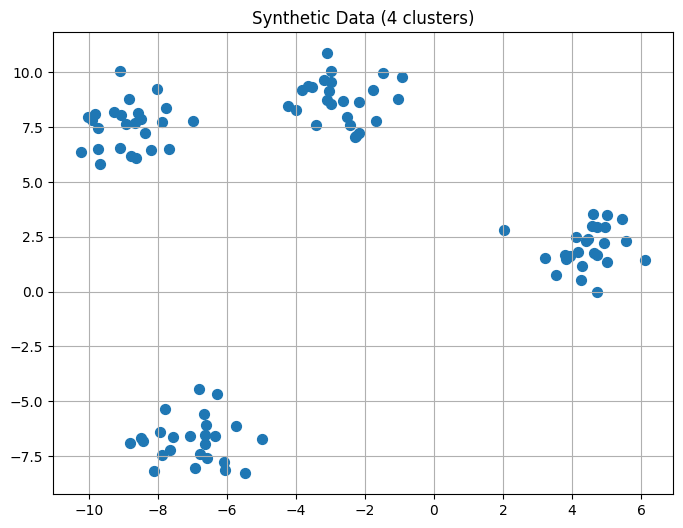

In [ ]:
# Plot
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Synthetic Data (4 clusters)")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

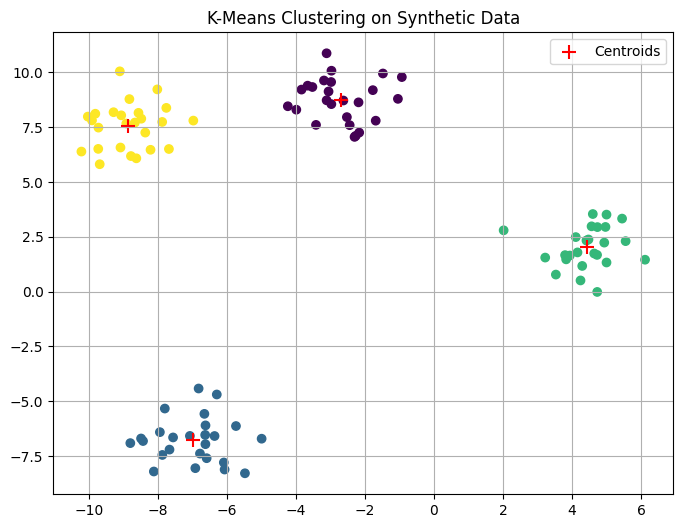

In [ ]:
# Plot clusters with centroids
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='+', label='Centroids')
plt.title("K-Means Clustering on Synthetic Data")
plt.legend()
plt.grid(True)
plt.show()


## Objective Function

K-Means minimizes this cost function:

$$
J = \sum_{k=1}^{K} \sum_{x_i \in C_k} \| x_i - \mu_k \|^2
$$

This is called **inertia** in scikit-learn. Lower inertia means tighter clusters.


In [ ]:
inertias = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

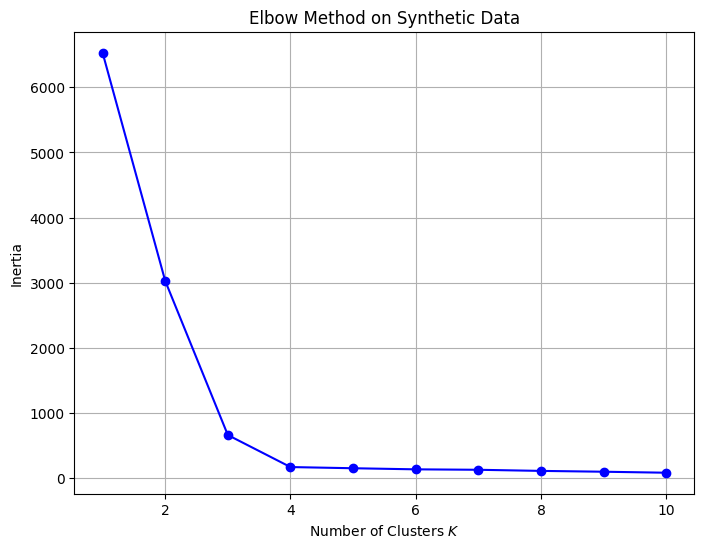

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters $K$')
plt.ylabel('Inertia')
plt.title('Elbow Method on Synthetic Data')
plt.grid(True)
plt.show()


## Elbow Method

We plot the number of clusters $K$ vs. inertia.

The **"elbow point"** is where the rate of decrease in inertia slows down. That is the optimal $K$.

This helps us balance **simplicity** and **accuracy**.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

In [ ]:
# Load Iris dataset
iris = load_iris()
X_iris = iris.data
df = pd.DataFrame(X_iris, columns=iris.feature_names)

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Fit KMeans to Iris data
kmeans_iris = KMeans(n_clusters=3, random_state=42)
kmeans_iris.fit(X_iris)
df['Cluster'] = kmeans_iris.labels_

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# Reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_iris)

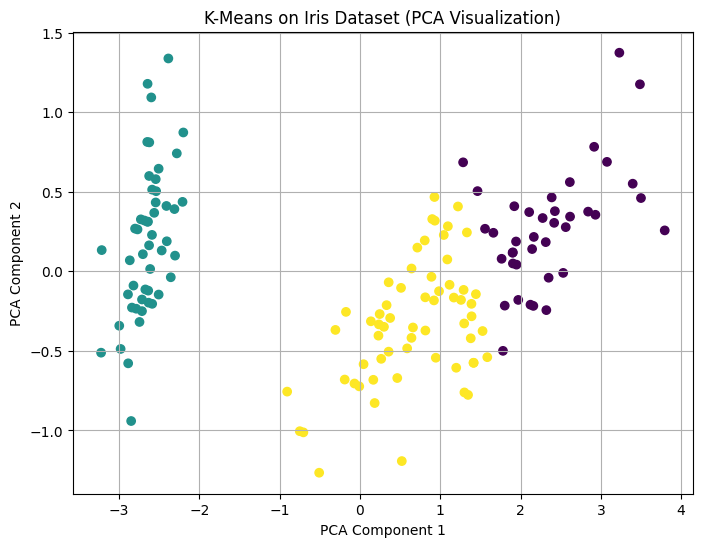

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.title("K-Means on Iris Dataset (PCA Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

In [ ]:
inertias_iris = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_iris)
    inertias_iris.append(km.inertia_)

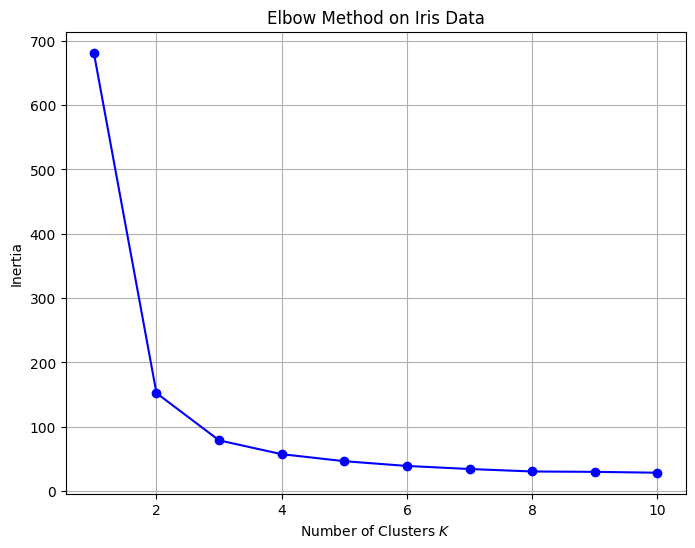

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11), inertias_iris, 'bo-')
plt.title('Elbow Method on Iris Data')
plt.xlabel('Number of Clusters $K$')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

## Summary

- K-Means clusters data based on similarity
- It minimizes intra-cluster variance (inertia)
- Elbow method helps choose optimal $K$
- Visualization is easiest on 2D synthetic data
- Can be extended to multi-dimensional real datasets (like Iris)